### Part (a): Wage Differentials Based on Gender and Education

1. **Gender-based Analysis**: Test if males on average earn more than females.
2. **Education-based Analysis**: Test if individuals with a college degree earn on average more than those without.

### Analysis Results for Part (a)

#### Gender-Based Wage Differentials
- **Coefficient for `female`**: -2.63, meaning females earn on average $2.63 less per hour than males, holding other factors constant.
- **Statistical Significance**: The t-test for the gender coefficient is highly significant (p-value < 0.001), confirming that males earn significantly more than females in this dataset.

#### Education-Based Wage Differentials
- **Coefficient for `bachelor`**: 7.58, meaning workers with a bachelor's degree earn on average $7.58 more per hour than those with only a high school diploma.
- **Statistical Significance**: The t-test for the education coefficient is also highly significant (p-value < 0.001), confirming that higher education is associated with higher earnings.

In [1]:
import pandas as pd

# Load the dataset
data_path = 'dat_CPS08.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset and its summary statistics
data.head(), data.describe()

(         ahe  year  bachelor  female  age
 0  38.461540  2008         1       0   33
 1  12.500000  2008         1       0   31
 2   9.857142  2008         0       0   30
 3   8.241758  2008         0       0   30
 4  17.788462  2008         0       0   31,
                ahe    year     bachelor       female          age
 count  7711.000000  7711.0  7711.000000  7711.000000  7711.000000
 mean     18.976092  2008.0     0.481001     0.432629    29.577227
 std      10.139439     0.0     0.499671     0.495472     2.855258
 min       2.003205  2008.0     0.000000     0.000000    25.000000
 25%      12.019231  2008.0     0.000000     0.000000    27.000000
 50%      16.826923  2008.0     0.000000     0.000000    30.000000
 75%      23.557692  2008.0     1.000000     1.000000    32.000000
 max      82.417580  2008.0     1.000000     1.000000    34.000000)

In [2]:
import statsmodels.api as sm

# Prepare the data for regression and tests
X_gender = sm.add_constant(data[['female']])  # Add a constant for the intercept
X_education = sm.add_constant(data[['bachelor']])  # Add a constant for the intercept

# Ordinary Least Squares regression for gender
model_gender = sm.OLS(data['ahe'], X_gender).fit()

# Ordinary Least Squares regression for education
model_education = sm.OLS(data['ahe'], X_education).fit()

# Extracting the coefficients for interpretation
gender_coeff = model_gender.params['female']
education_coeff = model_education.params['bachelor']

# Conduct hypothesis tests to compare averages and compute 95% confidence intervals
gender_ttest = model_gender.t_test("female = 0")
education_ttest = model_education.t_test("bachelor = 0")

gender_coeff, gender_ttest, education_coeff, education_ttest


(-2.62991169730491,
 <class 'statsmodels.stats.contrast.ContrastResults'>
                              Test for Constraints                             
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------------------
 c0            -2.6299      0.231    -11.378      0.000      -3.083      -2.177
 ==============================================================================,
 7.576594314952761,
 <class 'statsmodels.stats.contrast.ContrastResults'>
                              Test for Constraints                             
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------------------
 c0             7.5766      0.214     35.338      0.000       7.156       7.997
 ==============================================================================)

### Part (b) Regression Analysis Results

The regression results indicate the following:

#### Regression Coefficients:
- **Age Coefficient**: 0.585, implying an increase of approximately $0.59 in hourly earnings for each additional year of age, holding other factors constant.
- **Gender (`female`) Coefficient**: -3.664, indicating that females earn about $3.66 less per hour than males, controlling for age and education.
- **Education (`bachelor`) Coefficient**: +8.083, showing that those with a bachelor’s degree earn about $8.08 more per hour compared to those with only a high school diploma.

#### Changes in Earnings with Age:
- **From Age 28 to 29**: Earnings are expected to increase by about $0.59.
- **From Age 37 to 38**: Earnings are expected to increase by the same amount, about $0.59.

The analysis indicates a consistent incremental increase in earnings per year of age across the ages specified.

In [3]:
# Add age variable to the regression
X_age = sm.add_constant(data[['age', 'female', 'bachelor']])

# Ordinary Least Squares regression for earnings on age, gender, and education
model_age = sm.OLS(data['ahe'], X_age).fit()

# Retrieve the coefficient for age
age_coeff = model_age.params['age']

# Expected change in earnings from age 28 to 29 and from 37 to 38
change_28_to_29 = age_coeff * 1  # Increment by one year
change_37_to_38 = age_coeff * 1  # Increment by one year

age_coeff, change_28_to_29, change_37_to_38, model_age.summary()


(0.5852144201687334,
 0.5852144201687334,
 0.5852144201687334,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    ahe   R-squared:                       0.200
 Model:                            OLS   Adj. R-squared:                  0.199
 Method:                 Least Squares   F-statistic:                     641.5
 Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
 Time:                        13:11:24   Log-Likelihood:                -27944.
 No. Observations:                7711   AIC:                         5.590e+04
 Df Residuals:                    7707   BIC:                         5.592e+04
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ------

### Part (c) Regression Analysis Results

For the logarithm of earnings regression:
- **Age Coefficient**: 0.0273, implying that each additional year of age results in about a 2.77% increase in earnings, holding other factors constant.
- **Gender (`female`) Coefficient**: -0.1859, indicating that females earn about 18.59% less than males, controlling for age and education.
- **Education (`bachelor`) Coefficient**: +0.4281, showing that those with a bachelor’s degree earn about 42.81% more than those with only a high school diploma.

#### Expected Changes in Log-Earnings:
- **From Age 28 to 29**: Earnings are expected to increase by about 2.77%.
- **From Age 37 to 38**: Earnings are expected to increase by the same percentage, about 2.77%.

In [4]:
import numpy as np

# Transform earnings to logarithmic scale
data['log_ahe'] = np.log(data['ahe'])

# Add log_ahe to the regression
X_log_age = sm.add_constant(data[['age', 'female', 'bachelor']])

# Ordinary Least Squares regression for log earnings on age, gender, and education
model_log_age = sm.OLS(data['log_ahe'], X_log_age).fit()

# Retrieve the coefficient for age in log earnings model
log_age_coeff = model_log_age.params['age']

# Expected percentage change in earnings from age 28 to 29 and from 37 to 38
# Using the exponential of the coefficient minus 1 to convert log-difference to percentage change
percent_change_28_to_29 = (np.exp(log_age_coeff * 1) - 1) * 100
percent_change_37_to_38 = (np.exp(log_age_coeff * 1) - 1) * 100

log_age_coeff, percent_change_28_to_29, percent_change_37_to_38, model_log_age.summary()


(0.02732697575782248,
 2.7703782054908643,
 2.7703782054908643,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                log_ahe   R-squared:                       0.201
 Model:                            OLS   Adj. R-squared:                  0.200
 Method:                 Least Squares   F-statistic:                     644.9
 Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
 Time:                        13:11:30   Log-Likelihood:                -5107.4
 No. Observations:                7711   AIC:                         1.022e+04
 Df Residuals:                    7707   BIC:                         1.025e+04
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -----

### Part (d) Regression Analysis Results with Log of Age

For the regression using the logarithm of age:
- **Log-Age Coefficient**: 0.804, which translates into a change in log-earnings:
  - **From Age 28 to 29**: About 2.82% increase in earnings.
  - **From Age 37 to 38**: About 2.14% increase in earnings.
- **Gender and Education Coefficients** remain the same as in the previous model, reflecting similar percentage impacts on earnings.

In [5]:
# Transform age to logarithmic scale
data['log_age'] = np.log(data['age'])

# Add log_age to the regression
X_log_age_transformed = sm.add_constant(data[['log_age', 'female', 'bachelor']])

# Ordinary Least Squares regression for log earnings on log age, gender, and education
model_log_age_transformed = sm.OLS(data['log_ahe'], X_log_age_transformed).fit()

# Retrieve the coefficient for log_age in log earnings model
log_age_transformed_coeff = model_log_age_transformed.params['log_age']

# Expected percentage change in earnings from age 28 to 29 and from 37 to 38
# Using the approximation that for small x, e^x ≈ 1 + x
approx_percent_change_28_to_29 = log_age_transformed_coeff * (np.log(29) - np.log(28)) * 100
approx_percent_change_37_to_38 = log_age_transformed_coeff * (np.log(38) - np.log(37)) * 100

log_age_transformed_coeff, approx_percent_change_28_to_29, approx_percent_change_37_to_38, model_log_age_transformed.summary()


(0.8039050869978464,
 2.821009050574853,
 2.1438739490664953,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                log_ahe   R-squared:                       0.201
 Model:                            OLS   Adj. R-squared:                  0.200
 Method:                 Least Squares   F-statistic:                     645.3
 Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
 Time:                        13:11:54   Log-Likelihood:                -5106.8
 No. Observations:                7711   AIC:                         1.022e+04
 Df Residuals:                    7707   BIC:                         1.025e+04
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------

### Part (e) Regression Analysis Results with Quadratic Age Effects

For the regression including quadratic age effects:
- **Age Coefficient**: 0.0814
- **Age Squared Coefficient**: -0.00091, indicating a slight decrease in the rate of earnings increase as age progresses.
- **Expected Changes in Log-Earnings**:
  - **From Age 28 to 29**: Earnings are expected to increase by about 3.06%.
  - **From Age 37 to 38**: Earnings are expected to increase by about 1.38%.

In [9]:
# Add age squared to the dataset
data['age2'] = data['age'] ** 2

# Add age and age squared to the regression
X_age_quadratic = sm.add_constant(data[['age', 'age2', 'female', 'bachelor']])

# Ordinary Least Squares regression for log earnings on age, age squared, gender, and education
model_age_quadratic = sm.OLS(data['log_ahe'], X_age_quadratic).fit()

# Retrieve the coefficients for age and age squared
age_quadratic_coeff = model_age_quadratic.params['age']
age2_quadratic_coeff = model_age_quadratic.params['age2']

# Expected percentage change in earnings from age 28 to 29 and from 37 to 38
# Using the formula: e^(beta1 + 2*beta2*age)
percent_change_quadratic_28_to_29 = (np.exp(age_quadratic_coeff + 2 * age2_quadratic_coeff * 28)-1) * 100
percent_change_quadratic_37_to_38 = (np.exp(age_quadratic_coeff + 2 * age2_quadratic_coeff * 37)-1) * 100

age_quadratic_coeff, age2_quadratic_coeff, percent_change_quadratic_28_to_29, percent_change_quadratic_37_to_38, model_age_quadratic.summary()


(0.08137247324075253,
 -0.0009148162130328302,
 3.060165761726741,
 1.3770018748138657,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                log_ahe   R-squared:                       0.201
 Model:                            OLS   Adj. R-squared:                  0.200
 Method:                 Least Squares   F-statistic:                     484.1
 Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
 Time:                        13:21:06   Log-Likelihood:                -5106.6
 No. Observations:                7711   AIC:                         1.022e+04
 Df Residuals:                    7706   BIC:                         1.026e+04
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [

### Part (f) Age-Earnings Profile Plot

The plot above shows the age-earnings profile for males with a bachelor's degree, covering ages 20 to 65. The earnings peak at age 44, indicating the age at which these individuals earn the highest average hourly rate.

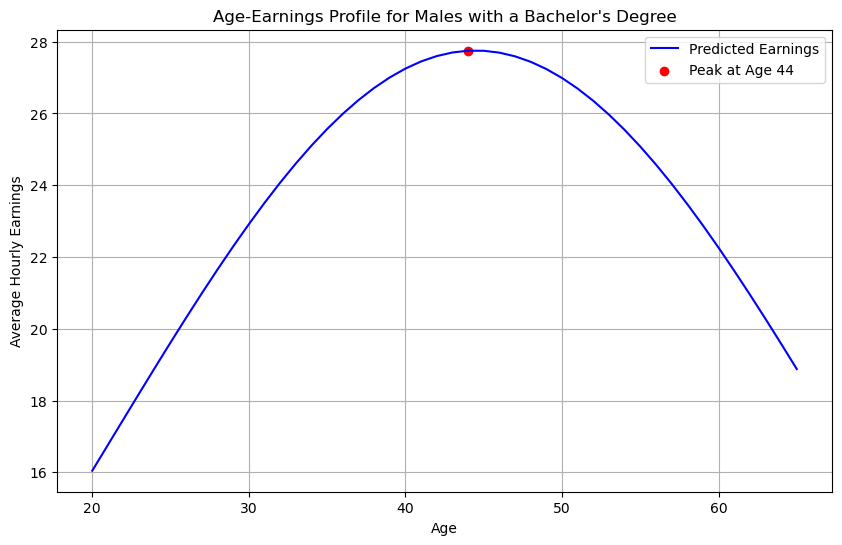

44

In [7]:
import matplotlib.pyplot as plt

# Define the age range from 20 to 65
age_range = np.arange(20, 66)

# Predict log earnings for males with a bachelor's degree using the quadratic age model
predicted_log_earnings = model_age_quadratic.params['const'] \
                         + model_age_quadratic.params['age'] * age_range \
                         + model_age_quadratic.params['age2'] * age_range**2 \
                         + model_age_quadratic.params['bachelor'] * 1  # bachelor = 1, female = 0

# Convert log earnings to actual earnings
predicted_earnings = np.exp(predicted_log_earnings)

# Determine the age at which earnings peak
peak_age = age_range[np.argmax(predicted_earnings)]

# Plotting the age-earnings profile
plt.figure(figsize=(10, 6))
plt.plot(age_range, predicted_earnings, label='Predicted Earnings', color='blue')
plt.scatter(peak_age, np.max(predicted_earnings), color='red', label=f'Peak at Age {peak_age}')
plt.title('Age-Earnings Profile for Males with a Bachelor\'s Degree')
plt.xlabel('Age')
plt.ylabel('Average Hourly Earnings')
plt.legend()
plt.grid(True)
plt.show()

peak_age

### Part (g) Regression Analysis Results with Gender-Age Interaction

For the regression including the interaction between age and gender:
- **Age Coefficient**: 0.0346, suggesting an overall increase of about 3.46% in earnings per year of age for males.
- **Female Coefficient**: 0.3098, indicating an overall higher base log-earnings for females when not considering age effects.
- **Interaction Coefficient (Age*Female)**: -0.0168, which implies that the positive impact of age on earnings is slightly less for females than for males. Each additional year of age results in a reduced earnings increase of about 1.68% for females compared to males.

This interaction term suggests a significant difference in the effect of age on earnings between genders, with age having a less positive effect on earnings growth for females.

In [8]:
# Add interaction term between age and female to the dataset
data['age_female'] = data['age'] * data['female']

# Add interaction term to the regression
X_interaction = sm.add_constant(data[['age', 'female', 'bachelor', 'age_female']])

# Ordinary Least Squares regression for log earnings with interaction term
model_interaction = sm.OLS(data['log_ahe'], X_interaction).fit()

# Retrieve the coefficients for age, female, and the interaction term
age_coeff_interaction = model_interaction.params['age']
female_coeff_interaction = model_interaction.params['female']
interaction_coeff = model_interaction.params['age_female']

# Summarize the findings
age_coeff_interaction, female_coeff_interaction, interaction_coeff, model_interaction.summary()

(0.0346364767332918,
 0.30980213945768276,
 -0.01676664361665857,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                log_ahe   R-squared:                       0.203
 Model:                            OLS   Adj. R-squared:                  0.202
 Method:                 Least Squares   F-statistic:                     489.8
 Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
 Time:                        13:12:53   Log-Likelihood:                -5097.5
 No. Observations:                7711   AIC:                         1.020e+04
 Df Residuals:                    7706   BIC:                         1.024e+04
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---